## Intelligent Robotics Python Library 사용 예제 1
## Written by 최동일, dongilc@mju.ac.kr
#### BSD License.

In [1]:
import intelligent_robotics as ir
import sympy
sympy.init_printing()

In [2]:
# 사용가능 명령어 보기
dir(ir)

['DH',
 'N',
 'Path_Gen',
 'ReferenceFrame',
 'Trapezoidal_Traj_Gen_Given_Amax_and_T',
 'Trapezoidal_Traj_Gen_Given_Vmax_and_Amax',
 'Trapezoidal_Traj_Gen_Given_Vmax_and_T',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'dynamicsymbols',
 'get_Christoffel_term',
 'get_EoM_from_T',
 'get_Jacobian_from_ft',
 'get_Jacobian_from_vel',
 'get_P_from_T',
 'get_R_from_T',
 'get_angular_acc_P',
 'get_angular_acc_R',
 'get_angular_vel_P',
 'get_angular_vel_R',
 'get_com_acc',
 'get_com_vel',
 'get_dynamics_force_i',
 'get_dynamics_torque_i',
 'get_kinectic_energy',
 'get_lagrangian',
 'get_linear_acc_P',
 'get_linear_acc_R',
 'get_linear_vel_P',
 'get_linear_vel_R',
 'get_potential_energy',
 'get_statics_force_i',
 'get_statics_torque_i',
 'get_torque_from_L',
 'math',
 'numpy',
 'sympy',
 'time_derivative']

In [3]:
# 명령어 사용법 보기
help(ir.DH)
help(ir.get_angular_acc_P)

Help on function DH in module intelligent_robotics:

DH(a, alpha, d, theta)
    ###### 동차변환
    # DH 파라미터를 이용해 Homogeneous Transformation Matrix 만드는 함수

Help on function get_angular_acc_P in module intelligent_robotics:

get_angular_acc_P(T_i_ip1, wd_i_i)
    ###### 동역학 공식 - Newton-Euler
    ### 직동관절
    # 속도전파식을 이용하여 각가속도를 구하는 함수



### 예제 1. 연습문제 3-3의 RR형 로봇

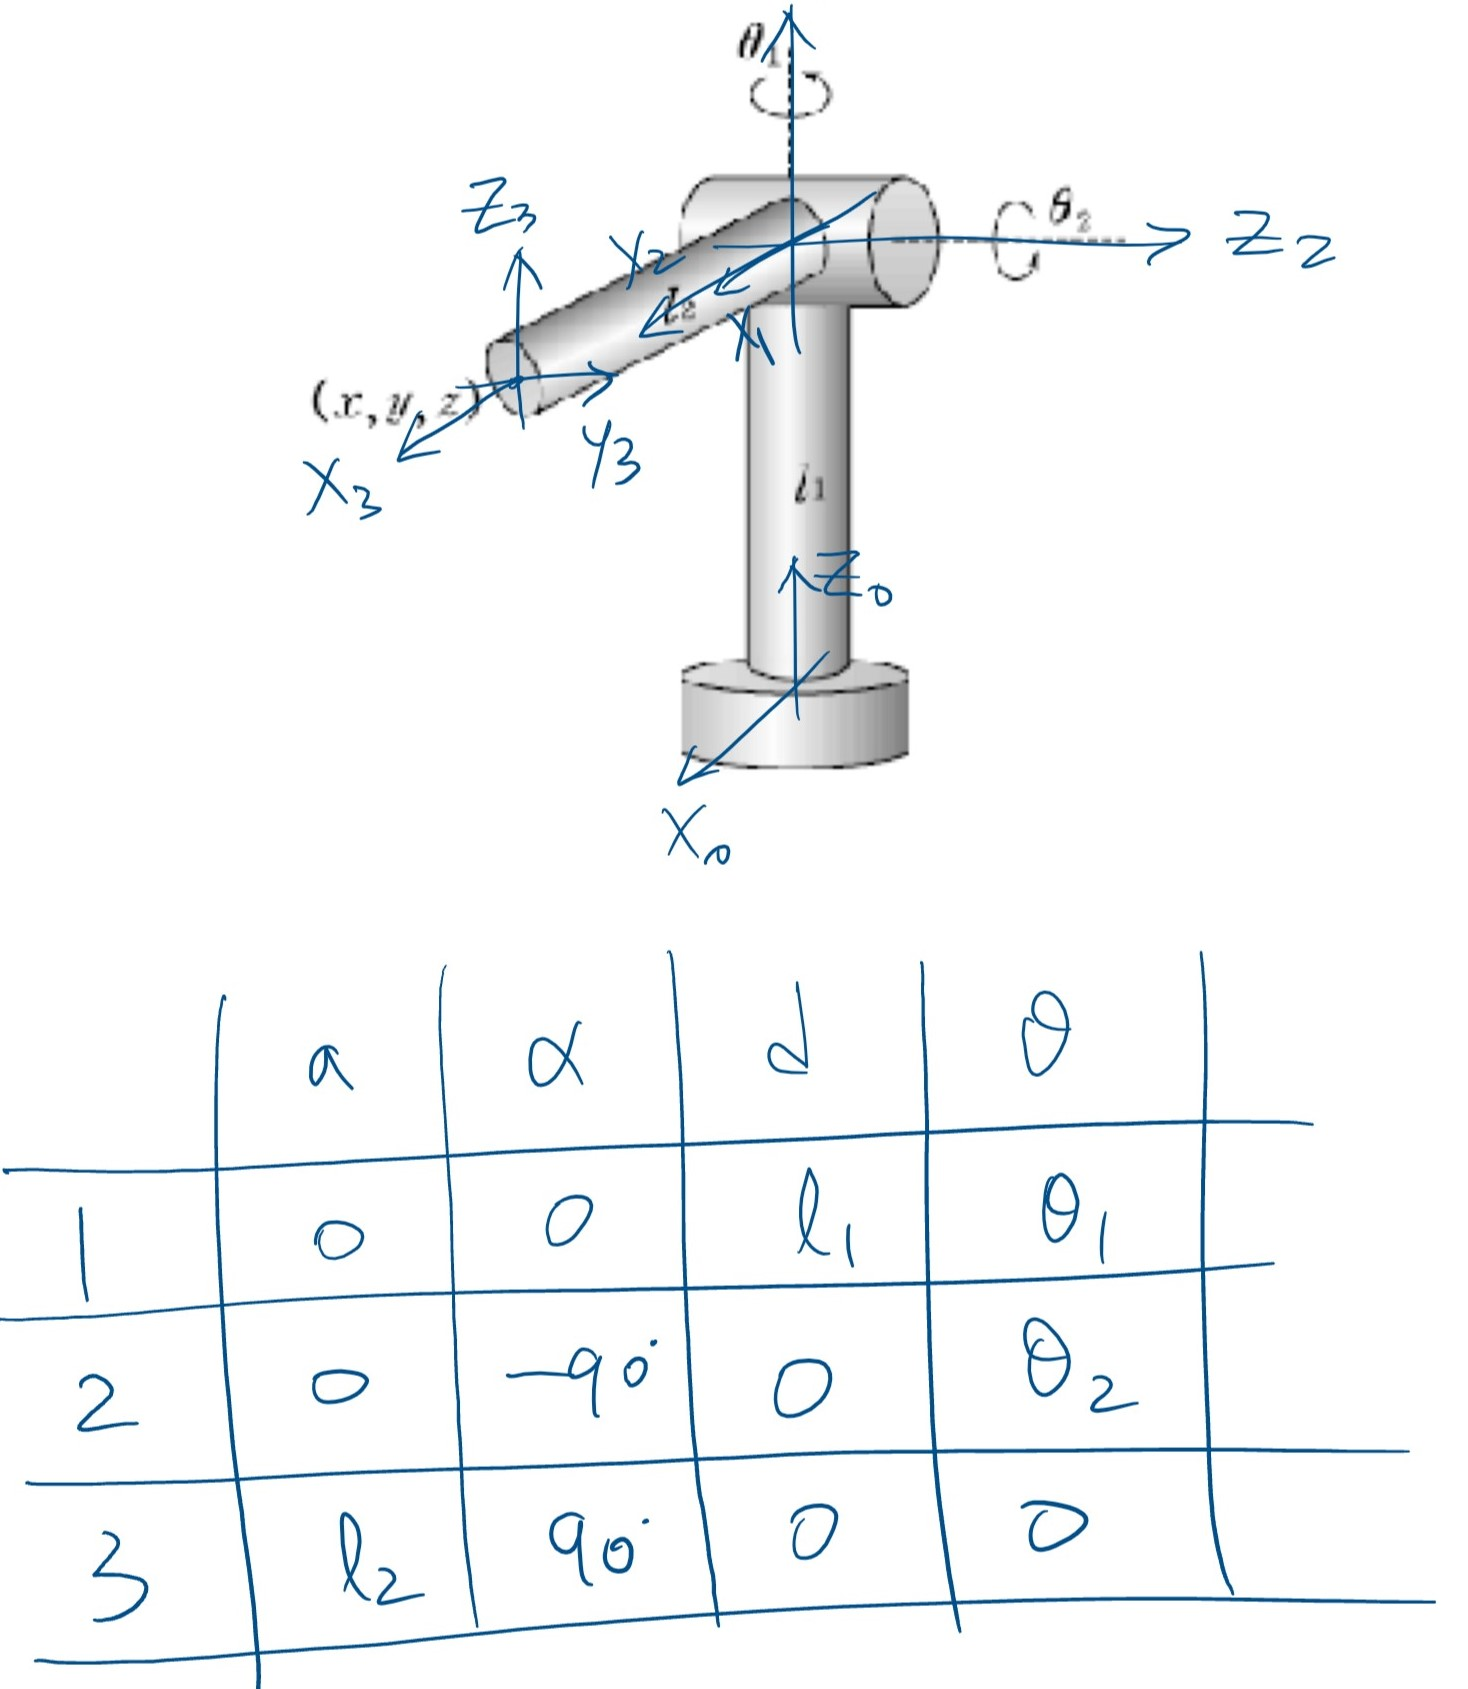

In [4]:
from IPython.display import Image
Image('figure/practice_3.3_fig.jpg', width=300)

In [5]:
theta1,theta2 = ir.dynamicsymbols('theta1,theta2')

In [6]:
l1,l1g,l2,l2g,IG1,IG2,m1,m2 = sympy.symbols('l1,l1g,l2,l2g,IG1,IG2,m1,m2')

#### DH Parameter를 이용한 동차변환 구하기

In [7]:
T01 = ir.DH(0,0,l1,theta1)

In [8]:
T12 = ir.DH(0,-sympy.rad(90),0,theta2)

In [9]:
T23 = ir.DH(l2,sympy.rad(90),0,0)

In [10]:
T01, T12, T23

⎛⎡cos(θ₁(t))  -sin(θ₁(t))  0  0 ⎤  ⎡cos(θ₂(t))   -sin(θ₂(t))  0  0⎤  ⎡1  0  0 
⎜⎢                              ⎥  ⎢                              ⎥  ⎢        
⎜⎢sin(θ₁(t))  cos(θ₁(t))   0  0 ⎥  ⎢     0            0       1  0⎥  ⎢0  0  -1
⎜⎢                              ⎥, ⎢                              ⎥, ⎢        
⎜⎢    0            0       1  l₁⎥  ⎢-sin(θ₂(t))  -cos(θ₂(t))  0  0⎥  ⎢0  1  0 
⎜⎢                              ⎥  ⎢                              ⎥  ⎢        
⎝⎣    0            0       0  1 ⎦  ⎣     0            0       0  1⎦  ⎣0  0  0 

  l₂⎤⎞
    ⎥⎟
  0 ⎥⎟
    ⎥⎟
  0 ⎥⎟
    ⎥⎟
  1 ⎦⎠

#### 자코비안 구하기

In [11]:
w_0_0 = sympy.Matrix([[0],[0],[0]])
w_1_1 = ir.get_angular_vel_R(T01,w_0_0,theta1.diff())
w_2_2 = ir.get_angular_vel_R(T12,w_1_1,theta2.diff())
w_3_3 = ir.get_angular_vel_R(T23,w_2_2,0)

In [12]:
w_1_1,w_2_2,w_3_3

⎛             ⎡            d        ⎤  ⎡            d        ⎤⎞
⎜             ⎢-sin(θ₂(t))⋅──(θ₁(t))⎥  ⎢-sin(θ₂(t))⋅──(θ₁(t))⎥⎟
⎜⎡    0    ⎤  ⎢            dt       ⎥  ⎢            dt       ⎥⎟
⎜⎢         ⎥  ⎢                     ⎥  ⎢                     ⎥⎟
⎜⎢    0    ⎥  ⎢            d        ⎥  ⎢      d              ⎥⎟
⎜⎢         ⎥, ⎢-cos(θ₂(t))⋅──(θ₁(t))⎥, ⎢      ──(θ₂(t))      ⎥⎟
⎜⎢d        ⎥  ⎢            dt       ⎥  ⎢      dt             ⎥⎟
⎜⎢──(θ₁(t))⎥  ⎢                     ⎥  ⎢                     ⎥⎟
⎜⎣dt       ⎦  ⎢      d              ⎥  ⎢           d         ⎥⎟
⎜             ⎢      ──(θ₂(t))      ⎥  ⎢cos(θ₂(t))⋅──(θ₁(t)) ⎥⎟
⎝             ⎣      dt             ⎦  ⎣           dt        ⎦⎠

In [13]:
v_0_0 = sympy.Matrix([[0],[0],[0]])
v_1_1 = ir.get_linear_vel_R(T01,w_0_0,v_0_0)
v_2_2 = ir.get_linear_vel_R(T12,w_1_1,v_1_1)
v_3_3 = ir.get_linear_vel_R(T23,w_2_2,v_2_2)

In [14]:
v_1_1,v_2_2,v_3_3

⎛          ⎡           0           ⎤⎞
⎜          ⎢                       ⎥⎟
⎜⎡0⎤  ⎡0⎤  ⎢              d        ⎥⎟
⎜⎢ ⎥  ⎢ ⎥  ⎢l₂⋅cos(θ₂(t))⋅──(θ₁(t))⎥⎟
⎜⎢0⎥, ⎢0⎥, ⎢              dt       ⎥⎟
⎜⎢ ⎥  ⎢ ⎥  ⎢                       ⎥⎟
⎜⎣0⎦  ⎣0⎦  ⎢         d             ⎥⎟
⎜          ⎢     -l₂⋅──(θ₂(t))     ⎥⎟
⎝          ⎣         dt            ⎦⎠

In [15]:
qd = sympy.Matrix([[theta1.diff()],[theta2.diff()]])

In [16]:
J_3_3 = ir.get_Jacobian_from_vel(w_3_3,v_3_3,qd)

In [17]:
# Body Jacobian
J_3_3

⎡      0         0 ⎤
⎢                  ⎥
⎢l₂⋅cos(θ₂(t))   0 ⎥
⎢                  ⎥
⎢      0        -l₂⎥
⎢                  ⎥
⎢ -sin(θ₂(t))    0 ⎥
⎢                  ⎥
⎢      0         1 ⎥
⎢                  ⎥
⎣ cos(θ₂(t))     0 ⎦

In [18]:
w_0_3 = ir.get_R_from_T(T01*T12*T23)*w_3_3
v_0_3 = ir.get_R_from_T(T01*T12*T23)*v_3_3
J_0_3 = ir.get_Jacobian_from_vel(w_0_3,v_0_3,qd)

In [19]:
# Space Jacobian
J_0_3

⎡-l₂⋅sin(θ₁(t))⋅cos(θ₂(t))  -l₂⋅sin(θ₂(t))⋅cos(θ₁(t))⎤
⎢                                                    ⎥
⎢l₂⋅cos(θ₁(t))⋅cos(θ₂(t))   -l₂⋅sin(θ₁(t))⋅sin(θ₂(t))⎥
⎢                                                    ⎥
⎢            0                   -l₂⋅cos(θ₂(t))      ⎥
⎢                                                    ⎥
⎢            0                     -sin(θ₁(t))       ⎥
⎢                                                    ⎥
⎢            0                     cos(θ₁(t))        ⎥
⎢                                                    ⎥
⎣            1                          0            ⎦

#### 머니퓰레이터 정역학 구하기

In [20]:
f_x, f_y, f_z = sympy.symbols('f_x, f_y, f_z')

In [21]:
f_3_3 = sympy.Matrix([[f_x],[f_y],[f_z]])
n_3_3 = sympy.Matrix([[0],[0],[0]])

In [22]:
f_2_2 = ir.get_statics_force_i(T23, f_3_3)
f_1_1 = ir.get_statics_force_i(T12, f_2_2)

In [23]:
f_2_2, f_1_1

⎛⎡ fₓ ⎤  ⎡fₓ⋅cos(θ₂(t)) + f_z⋅sin(θ₂(t)) ⎤⎞
⎜⎢    ⎥  ⎢                               ⎥⎟
⎜⎢-f_z⎥, ⎢              f_y              ⎥⎟
⎜⎢    ⎥  ⎢                               ⎥⎟
⎝⎣f_y ⎦  ⎣-fₓ⋅sin(θ₂(t)) + f_z⋅cos(θ₂(t))⎦⎠

In [24]:
n_2_2 = ir.get_statics_torque_i(T23, n_3_3, f_2_2)
n_1_1 = ir.get_statics_torque_i(T12, n_2_2, f_1_1)

In [25]:
n_2_2, n_1_1

⎛⎡   0   ⎤  ⎡f_y⋅l₂⋅sin(θ₂(t))⎤⎞
⎜⎢       ⎥  ⎢                 ⎥⎟
⎜⎢-f_y⋅l₂⎥, ⎢     -f_z⋅l₂     ⎥⎟
⎜⎢       ⎥  ⎢                 ⎥⎟
⎝⎣-f_z⋅l₂⎦  ⎣f_y⋅l₂⋅cos(θ₂(t))⎦⎠

In [26]:
T = sympy.Matrix([[n_1_1[2]],[n_2_2[2]]])
F = sympy.Matrix([[f_x],[f_y],[f_z]])

In [27]:
T, F

⎛                     ⎡fₓ ⎤⎞
⎜⎡f_y⋅l₂⋅cos(θ₂(t))⎤  ⎢   ⎥⎟
⎜⎢                 ⎥, ⎢f_y⎥⎟
⎜⎣     -f_z⋅l₂     ⎦  ⎢   ⎥⎟
⎝                     ⎣f_z⎦⎠

In [28]:
# T = J^T * F
# tau1           fx
# tau2  =  J^T * fy
# tau3           fz
Jt = ir.get_Jacobian_from_ft(F,T)

In [29]:
# 정역학식을 이용한 자코비안 구하기
J = Jt.T

In [30]:
# Body Jacobian
J

⎡      0         0 ⎤
⎢                  ⎥
⎢l₂⋅cos(θ₂(t))   0 ⎥
⎢                  ⎥
⎣      0        -l₂⎦

In [31]:
# 속도전파식을 이용해 구한 자코비안과 정역학식을 이용해 구한 자코비안의 결과가 같은지 체크. 모두 0으로 나오면 OK
sympy.simplify(J_3_3[0:3,:] - J)

⎡0  0⎤
⎢    ⎥
⎢0  0⎥
⎢    ⎥
⎣0  0⎦

#### 머니퓰레이터 동역학 구하기

In [32]:
# Netwon-Euler Method. 1. Forward Iteration

In [33]:
w_0_0 = sympy.Matrix([[0],[0],[0]])
w_1_1 = ir.get_angular_vel_R(T01,w_0_0,theta1.diff())
w_2_2 = ir.get_angular_vel_R(T12,w_1_1,theta2.diff())
w_3_3 = ir.get_angular_vel_R(T23,w_2_2,0)
wd_0_0 = sympy.Matrix([[0],[0],[0]])
wd_1_1 = ir.get_angular_acc_R(T01,w_0_0,wd_0_0,theta1.diff(),theta1.diff().diff())
wd_2_2 = ir.get_angular_acc_R(T12,w_1_1,wd_1_1,theta2.diff(),theta2.diff().diff())
wd_3_3 = ir.get_angular_acc_R(T23,w_2_2,wd_2_2,0,0)

In [34]:
v_0_0 = sympy.Matrix([[0],[0],[0]])
v_1_1 = ir.get_linear_vel_R(T01,w_0_0,v_0_0)
v_2_2 = ir.get_linear_vel_R(T12,w_1_1,v_1_1)
v_3_3 = ir.get_linear_vel_R(T23,w_2_2,v_2_2)
vd_0_0 = sympy.Matrix([[0],[0],[0]])
vd_1_1 = ir.get_linear_acc_R(T01,w_0_0,wd_0_0,vd_0_0)
vd_2_2 = ir.get_linear_acc_R(T12,w_1_1,wd_1_1,vd_1_1)
vd_3_3 = ir.get_linear_acc_R(T23,w_2_2,wd_2_2,vd_2_2)

In [35]:
r_1_G1 = sympy.Matrix([[l1g],[0],[0]])
r_2_G2 = sympy.Matrix([[l2g],[0],[0]])
vd_1_G1 = ir.get_com_acc(vd_1_1,w_1_1,wd_1_1,r_1_G1)
vd_2_G2 = ir.get_com_acc(vd_2_2,w_2_2,wd_2_2,r_2_G2)

In [36]:
# Netwon-Euler Method. 2. Inverse Iteration

In [37]:
g = sympy.symbols('g')

In [38]:
f_3_3 = sympy.Matrix([[0],[0],[0]])
n_3_3 = sympy.Matrix([[0],[0],[0]])
g_0 = sympy.Matrix([[0],[0],[-g]])

In [39]:
f_2_2 = ir.get_dynamics_force_i(T23,T01@T12,m2,g_0,vd_2_G2,f_3_3)
f_1_1 = ir.get_dynamics_force_i(T12,T01,m1,g_0,vd_1_G1,f_2_2)

In [40]:
# 참고 - 실행시간이 좀 오래걸림.
Ixx1,Iyy1,Izz1,Ixx2,Iyy2,Izz2 = sympy.symbols('Ixx1,Iyy1,Izz1,Ixx2,Iyy2,Izz2')
I_1_G1 = sympy.Matrix([[Ixx1,0,0],[0,Iyy1,0],[0,0,Izz1]])
I_2_G2 = sympy.Matrix([[Ixx2,0,0],[0,Iyy2,0],[0,0,Izz2]])
n_2_2 = ir.get_dynamics_torque_i(T23,n_3_3,f_2_2,f_3_3,w_2_2,wd_2_2,r_2_G2,I_2_G2)
n_1_1 = ir.get_dynamics_torque_i(T12,n_2_2,f_1_1,f_2_2,w_1_1,wd_1_1,r_1_G1,I_1_G1)

In [41]:
tau = sympy.Matrix([[n_1_1[2]],[n_2_2[2]]])

In [42]:
qdd = sympy.Matrix([[theta1.diff().diff()],[theta2.diff().diff()]])
M_ne, C_ne, G_ne = ir.get_EoM_from_T(tau,qdd,g)

In [43]:
M_ne

⎡        2                  2                    2         2       2          
⎢Ixx₂⋅sin (θ₂(t)) + Iyy₂⋅cos (θ₂(t)) + Izz₁ + l1g ⋅m₁ + l2g ⋅m₂⋅cos (θ₂(t))   
⎢                                                                             
⎢                                                                             
⎣                                    0                                       I

             ⎤
     0       ⎥
             ⎥
         2   ⎥
zz₂ + l2g ⋅m₂⎦

In [44]:
C_ne

⎡⎛                 2   ⎞              d         d        ⎤
⎢⎝Ixx₂ - Iyy₂ - l2g ⋅m₂⎠⋅sin(2⋅θ₂(t))⋅──(θ₁(t))⋅──(θ₂(t))⎥
⎢                                     dt        dt       ⎥
⎢                                                        ⎥
⎢                                                    2   ⎥
⎢   ⎛                  2   ⎞              ⎛d        ⎞    ⎥
⎢   ⎝-Ixx₂ + Iyy₂ + l2g ⋅m₂⎠⋅sin(2⋅θ₂(t))⋅⎜──(θ₁(t))⎟    ⎥
⎢                                         ⎝dt       ⎠    ⎥
⎢   ──────────────────────────────────────────────────   ⎥
⎣                           2                            ⎦

In [45]:
G_ne

⎡         0          ⎤
⎢                    ⎥
⎣-g⋅l2g⋅m₂⋅cos(θ₂(t))⎦

In [46]:
# Lagrangian Method

In [47]:
w_0_0 = sympy.Matrix([[0],[0],[0]])
w_1_1 = ir.get_angular_vel_R(T01,w_0_0,theta1.diff())
w_2_2 = ir.get_angular_vel_R(T12,w_1_1,theta2.diff())
w_3_3 = ir.get_angular_vel_R(T23,w_2_2,0)

In [48]:
w_1_1,w_2_2,w_3_3

⎛             ⎡            d        ⎤  ⎡            d        ⎤⎞
⎜             ⎢-sin(θ₂(t))⋅──(θ₁(t))⎥  ⎢-sin(θ₂(t))⋅──(θ₁(t))⎥⎟
⎜⎡    0    ⎤  ⎢            dt       ⎥  ⎢            dt       ⎥⎟
⎜⎢         ⎥  ⎢                     ⎥  ⎢                     ⎥⎟
⎜⎢    0    ⎥  ⎢            d        ⎥  ⎢      d              ⎥⎟
⎜⎢         ⎥, ⎢-cos(θ₂(t))⋅──(θ₁(t))⎥, ⎢      ──(θ₂(t))      ⎥⎟
⎜⎢d        ⎥  ⎢            dt       ⎥  ⎢      dt             ⎥⎟
⎜⎢──(θ₁(t))⎥  ⎢                     ⎥  ⎢                     ⎥⎟
⎜⎣dt       ⎦  ⎢      d              ⎥  ⎢           d         ⎥⎟
⎜             ⎢      ──(θ₂(t))      ⎥  ⎢cos(θ₂(t))⋅──(θ₁(t)) ⎥⎟
⎝             ⎣      dt             ⎦  ⎣           dt        ⎦⎠

In [49]:
v_0_0 = sympy.Matrix([[0],[0],[0]])
v_1_1 = ir.get_linear_vel_R(T01,w_0_0,v_0_0)
v_2_2 = ir.get_linear_vel_R(T12,w_1_1,v_1_1)
v_3_3 = ir.get_linear_vel_R(T23,w_2_2,v_2_2)

In [50]:
v_1_1,v_2_2,v_3_3

⎛          ⎡           0           ⎤⎞
⎜          ⎢                       ⎥⎟
⎜⎡0⎤  ⎡0⎤  ⎢              d        ⎥⎟
⎜⎢ ⎥  ⎢ ⎥  ⎢l₂⋅cos(θ₂(t))⋅──(θ₁(t))⎥⎟
⎜⎢0⎥, ⎢0⎥, ⎢              dt       ⎥⎟
⎜⎢ ⎥  ⎢ ⎥  ⎢                       ⎥⎟
⎜⎣0⎦  ⎣0⎦  ⎢         d             ⎥⎟
⎜          ⎢     -l₂⋅──(θ₂(t))     ⎥⎟
⎝          ⎣         dt            ⎦⎠

In [51]:
r_1_G1 = sympy.Matrix([[l1g],[0],[0]])
r_2_G2 = sympy.Matrix([[l2g],[0],[0]])
v_1_G1 = ir.get_com_vel(v_1_1,w_1_1,r_1_G1)
v_2_G2 = ir.get_com_vel(v_2_2,w_2_2,r_2_G2)

In [52]:
v_1_G1,v_2_G2

⎛                 ⎡           0            ⎤⎞
⎜⎡      0      ⎤  ⎢                        ⎥⎟
⎜⎢             ⎥  ⎢         d              ⎥⎟
⎜⎢    d        ⎥  ⎢     l2g⋅──(θ₂(t))      ⎥⎟
⎜⎢l1g⋅──(θ₁(t))⎥, ⎢         dt             ⎥⎟
⎜⎢    dt       ⎥  ⎢                        ⎥⎟
⎜⎢             ⎥  ⎢               d        ⎥⎟
⎜⎣      0      ⎦  ⎢l2g⋅cos(θ₂(t))⋅──(θ₁(t))⎥⎟
⎝                 ⎣               dt       ⎦⎠

In [53]:
# 운동에너지
Ixx1,Iyy1,Izz1,Ixx2,Iyy2,Izz2 = sympy.symbols('Ixx1,Iyy1,Izz1,Ixx2,Iyy2,Izz2')
I_1_G1 = sympy.Matrix([[Ixx1,0,0],[0,Iyy1,0],[0,0,Izz1]])
I_2_G2 = sympy.Matrix([[Ixx2,0,0],[0,Iyy2,0],[0,0,Izz2]])
T = ir.get_kinectic_energy(m1,v_1_G1,I_1_G1,w_1_1) + ir.get_kinectic_energy(m2,v_2_G2,I_2_G2,w_2_2)

In [54]:
T

⎡                                2                                   2        
⎢            2        ⎛d        ⎞                2        ⎛d        ⎞         
⎢0.5⋅Ixx₂⋅sin (θ₂(t))⋅⎜──(θ₁(t))⎟  + 0.5⋅Iyy₂⋅cos (θ₂(t))⋅⎜──(θ₁(t))⎟  + 0.5⋅I
⎣                     ⎝dt       ⎠                         ⎝dt       ⎠         

               2                       2                          2           
    ⎛d        ⎞             ⎛d        ⎞           2    ⎛d        ⎞           2
zz₁⋅⎜──(θ₁(t))⎟  + 0.5⋅Izz₂⋅⎜──(θ₂(t))⎟  + 0.5⋅l1g ⋅m₁⋅⎜──(θ₁(t))⎟  + 0.5⋅l2g 
    ⎝dt       ⎠             ⎝dt       ⎠                ⎝dt       ⎠            

                           2                          2⎤
       2        ⎛d        ⎞           2    ⎛d        ⎞ ⎥
⋅m₂⋅cos (θ₂(t))⋅⎜──(θ₁(t))⎟  + 0.5⋅l2g ⋅m₂⋅⎜──(θ₂(t))⎟ ⎥
                ⎝dt       ⎠                ⎝dt       ⎠ ⎦

In [55]:
# 위치에너지 구하기

In [56]:
g = sympy.symbols('g')

In [57]:
g_0 = sympy.Matrix([[0],[0],[-g]])

In [58]:
T02 = T01*T12
V = ir.get_potential_energy(T01,m1,g_0,r_1_G1) + ir.get_potential_energy(T02,m2,g_0,r_2_G2)

In [59]:
V

[g⋅l₁⋅m₁ + g⋅m₂⋅(l₁ - l2g⋅sin(θ₂(t)))]

In [60]:
# 라그랑지안 구하기
L = ir.get_lagrangian(T,V)

In [61]:
L

⎡                                2                                   2        
⎢            2        ⎛d        ⎞                2        ⎛d        ⎞         
⎢0.5⋅Ixx₂⋅sin (θ₂(t))⋅⎜──(θ₁(t))⎟  + 0.5⋅Iyy₂⋅cos (θ₂(t))⋅⎜──(θ₁(t))⎟  + 0.5⋅I
⎣                     ⎝dt       ⎠                         ⎝dt       ⎠         

               2                       2                                      
    ⎛d        ⎞             ⎛d        ⎞                                       
zz₁⋅⎜──(θ₁(t))⎟  + 0.5⋅Izz₂⋅⎜──(θ₂(t))⎟  - g⋅l₁⋅m₁ - g⋅m₂⋅(l₁ - l2g⋅sin(θ₂(t))
    ⎝dt       ⎠             ⎝dt       ⎠                                       

                           2                                      2           
           2    ⎛d        ⎞           2       2        ⎛d        ⎞           2
) + 0.5⋅l1g ⋅m₁⋅⎜──(θ₁(t))⎟  + 0.5⋅l2g ⋅m₂⋅cos (θ₂(t))⋅⎜──(θ₁(t))⎟  + 0.5⋅l2g 
                ⎝dt       ⎠                            ⎝dt       ⎠            

               2⎤
    ⎛d        ⎞ ⎥
⋅m₂⋅⎜──(θ₂(t)

In [62]:
q = sympy.Matrix([[theta1],[theta2]])
qd = sympy.Matrix([[theta1.diff()],[theta2.diff()]])
tau = ir.get_torque_from_L(L,q,qd)

In [63]:
# Get Equation of Motion

In [64]:
tau

⎡                       2                                                     
⎢            2         d                                 d         d          
⎢1.0⋅Ixx₂⋅sin (θ₂(t))⋅───(θ₁(t)) + 1.0⋅Ixx₂⋅sin(2⋅θ₂(t))⋅──(θ₁(t))⋅──(θ₂(t)) -
⎢                       2                                dt        dt         
⎢                     dt                                                      
⎢                                                                             
⎢                                                                             
⎢                                                                  ⎛          
⎢                                                              1.0⋅⎝Izz₂ + l2g
⎢                                                                             
⎣                                                                             

                                                                2             
                   d         d                     

In [65]:
qdd = sympy.Matrix([[theta1.diff().diff()],[theta2.diff().diff()]])
M_l, C_l, G_l = ir.get_EoM_from_T(tau,qdd,g)

In [66]:
M_l

⎡            2                      2                            2            
⎢1.0⋅Ixx₂⋅sin (θ₂(t)) + 1.0⋅Iyy₂⋅cos (θ₂(t)) + 1.0⋅Izz₁ + 1.0⋅l1g ⋅m₁ + 1.0⋅l2
⎢                                                                             
⎢                                                                             
⎣                                              0                              

 2       2                               ⎤
g ⋅m₂⋅cos (θ₂(t))            0           ⎥
                                         ⎥
                                     2   ⎥
                   1.0⋅Izz₂ + 1.0⋅l2g ⋅m₂⎦

In [67]:
C_l

⎡    ⎛                 2   ⎞              d         d        ⎤
⎢1.0⋅⎝Ixx₂ - Iyy₂ - l2g ⋅m₂⎠⋅sin(2⋅θ₂(t))⋅──(θ₁(t))⋅──(θ₂(t))⎥
⎢                                         dt        dt       ⎥
⎢                                                            ⎥
⎢                                                        2   ⎥
⎢       ⎛                  2   ⎞              ⎛d        ⎞    ⎥
⎢   0.5⋅⎝-Ixx₂ + Iyy₂ + l2g ⋅m₂⎠⋅sin(2⋅θ₂(t))⋅⎜──(θ₁(t))⎟    ⎥
⎣                                             ⎝dt       ⎠    ⎦

In [68]:
G_l

⎡           0            ⎤
⎢                        ⎥
⎣-1.0⋅g⋅l2g⋅m₂⋅cos(θ₂(t))⎦

In [69]:
# Newton-Euler 방법과 Lagrangian 방법의 결과가 같은지 체크. 모두 0으로 나오면 OK
sympy.simplify(M_ne - M_l)

⎡0  0⎤
⎢    ⎥
⎣0  0⎦

In [70]:
# Newton-Euler 방법과 Lagrangian 방법의 결과가 같은지 체크. 모두 0으로 나오면 OK
sympy.simplify(C_ne - C_l)

⎡0⎤
⎢ ⎥
⎣0⎦

In [71]:
# Newton-Euler 방법과 Lagrangian 방법의 결과가 같은지 체크. 모두 0으로 나오면 OK
sympy.simplify(G_ne - G_l)

⎡0⎤
⎢ ⎥
⎣0⎦

In [72]:
# C term을 M term으로 부터 구하기
Gamma, C_christ = ir.get_Christoffel_term(M_l,q,qd)

In [73]:
# Chistoffel Symbol을 통해 구한 C(q,qd) term과 기존에 구해놓은 C term의 비교
C_christ, C_l

⎛⎡    ⎛                 2   ⎞              d         d        ⎤  ⎡    ⎛       
⎜⎢1.0⋅⎝Ixx₂ - Iyy₂ - l2g ⋅m₂⎠⋅sin(2⋅θ₂(t))⋅──(θ₁(t))⋅──(θ₂(t))⎥  ⎢1.0⋅⎝Ixx₂ - 
⎜⎢                                         dt        dt       ⎥  ⎢            
⎜⎢                                                            ⎥  ⎢            
⎜⎢                                                        2   ⎥, ⎢            
⎜⎢       ⎛                  2   ⎞              ⎛d        ⎞    ⎥  ⎢       ⎛    
⎜⎢   0.5⋅⎝-Ixx₂ + Iyy₂ + l2g ⋅m₂⎠⋅sin(2⋅θ₂(t))⋅⎜──(θ₁(t))⎟    ⎥  ⎢   0.5⋅⎝-Ixx
⎝⎣                                             ⎝dt       ⎠    ⎦  ⎣            

          2   ⎞              d         d        ⎤⎞
Iyy₂ - l2g ⋅m₂⎠⋅sin(2⋅θ₂(t))⋅──(θ₁(t))⋅──(θ₂(t))⎥⎟
                             dt        dt       ⎥⎟
                                                ⎥⎟
                                            2   ⎥⎟
              2   ⎞              ⎛d        ⎞    ⎥⎟
₂ + Iyy₂ + l2g ⋅m₂⎠⋅sin(2⋅θ₂(t))⋅⎜──(θ₁(t))⎟    ⎥⎟
          

In [74]:
# Chistoffel Symbol을 통해 구한 C(q,qd) term과 기존에 구해놓은 C term의 비교
sympy.simplify(C_christ - C_l)

⎡0⎤
⎢ ⎥
⎣0⎦